# Unsupervised Learning

# Clustering

the process of organizing objects into groups whose members are similar in some way.

**Dataset information**

These data are the results of a chemical analysis of wines.The analysis determined the quantities of 13 constituents found in each of the three types of wines.
The attributes are
1.Alcohol\
2.Malic acid\
3.Ash\
4.Alcalinity of ash\
5.Magnesium\
6.Total phenols\
7.Flavanoids\
8.Nonflavanoid phenols\
9.Proanthocyanins\
10.Color intensity\
11.Hue\
12.OD280/OD315 of diluted wines\
13.Proline

**CONTENTS**\
1.Kmeans\
2.Agglomerative clustering\
3.DBSCAN

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering,AffinityPropagation,DBSCAN
import scipy.cluster.hierarchy as sch

%matplotlib inline

# Loading and Checking dataset

In [2]:
wine_data=pd.read_csv(r'D:\DSA\Wine_clust.csv')

In [3]:
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# exploratory Data Analysis

In [4]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
print("Shape of the dataframe :",wine_data.shape)
print("Duplicated value count :",wine_data.duplicated().sum())

Shape of the dataframe : (178, 13)
Duplicated value count : 0


In [7]:
analysis = pd.DataFrame({
    'Unique':wine_data.nunique(),
    'Null':wine_data.isna().sum(),
    'Type':wine_data.dtypes.values
    
})
display(analysis)

,Unique,Null,Type
Alcohol,126,0,float64
Malic_Acid,133,0,float64
Ash,79,0,float64
Ash_Alcanity,63,0,float64
Magnesium,53,0,int64
Total_Phenols,97,0,float64
Flavanoids,132,0,float64
Nonflavanoid_Phenols,39,0,float64
Proanthocyanins,101,0,float64
Color_Intensity,132,0,float64


There is no duplicate value is found and no null values.

In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Data Visualization

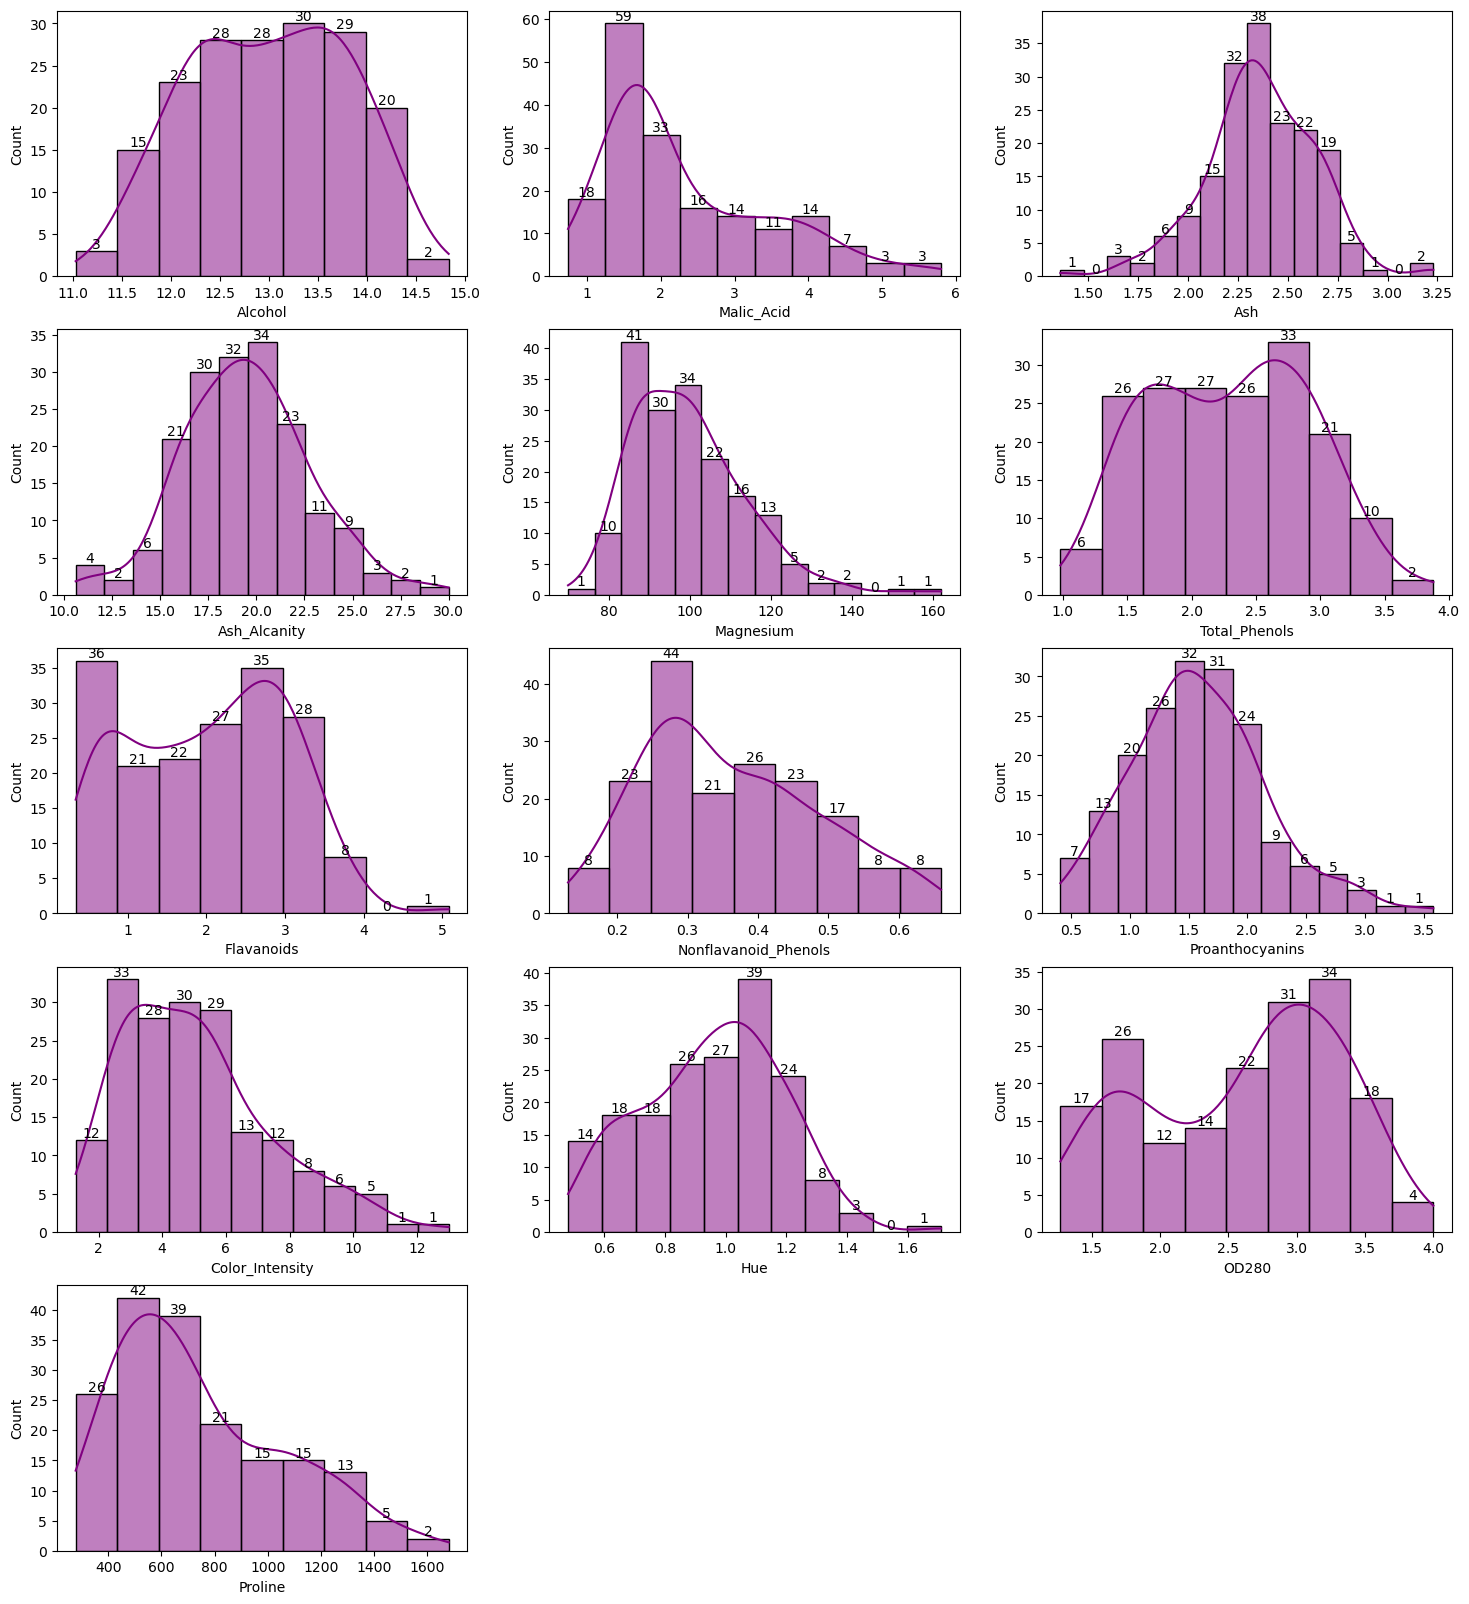

In [9]:
plot=1
plt.figure(figsize=(18,20))
for i in wine_data.columns: 
    plt.subplot(5,3,plot)
    ax = sns.histplot(data = wine_data , x = i , kde = True, palette="bright",color="purple" )
    plt.xlabel(i)
    plot+=1
    for i in ax.containers:     
        ax.bar_label(i)

**Checking for outliers**

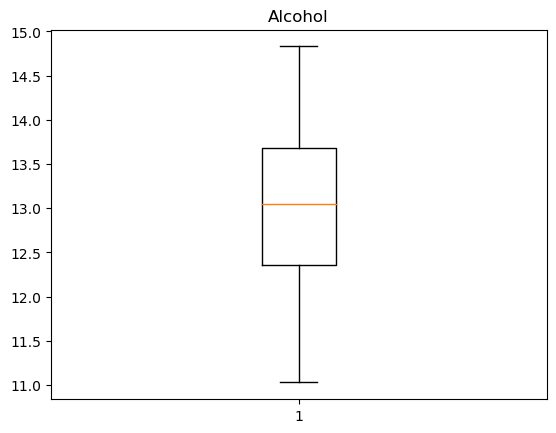

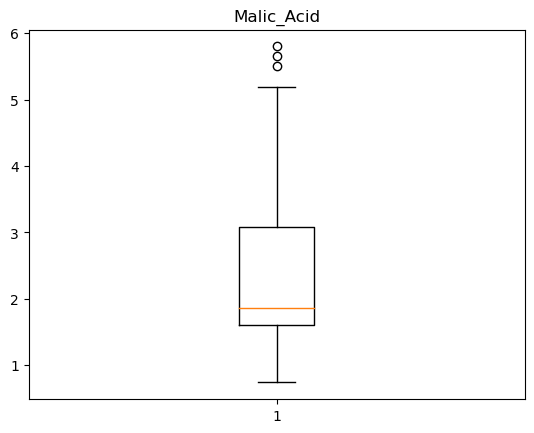

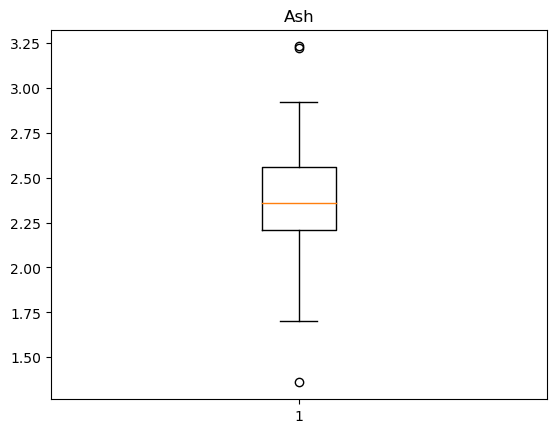

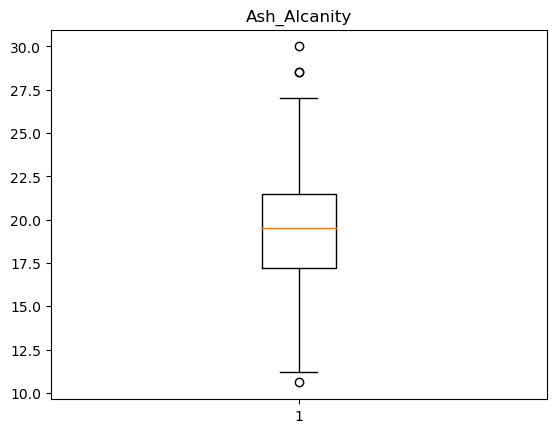

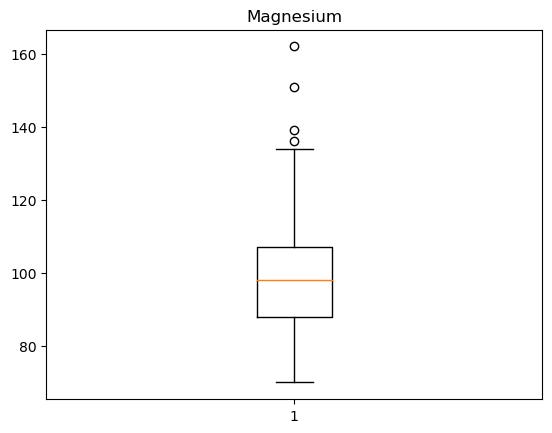

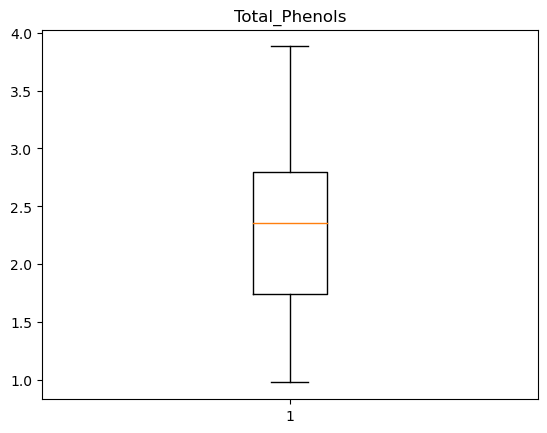

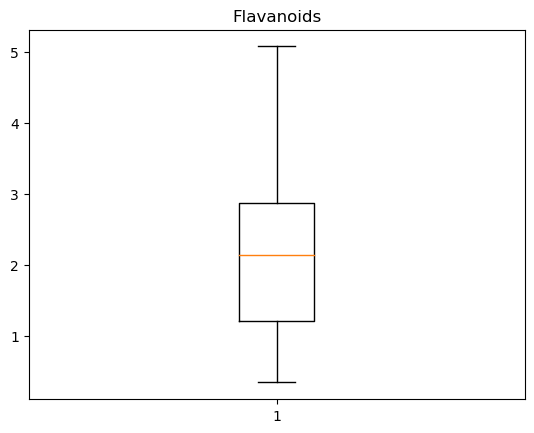

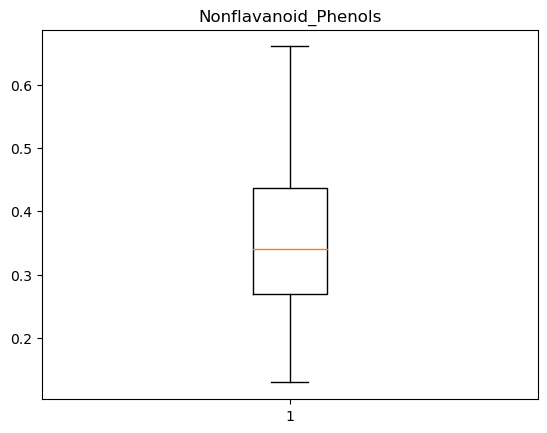

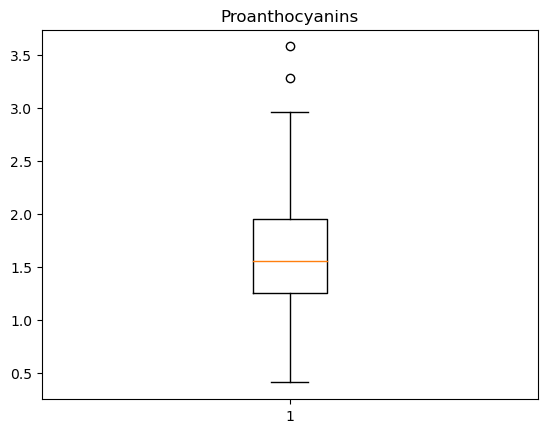

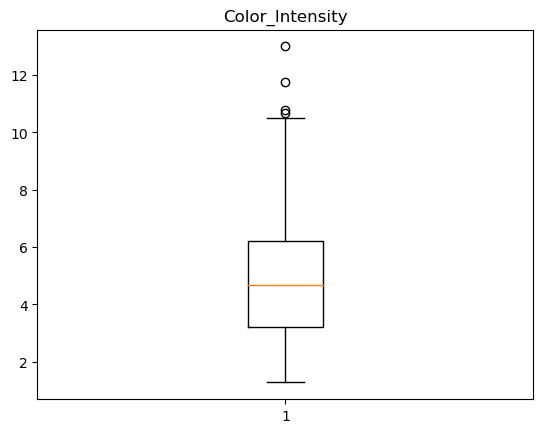

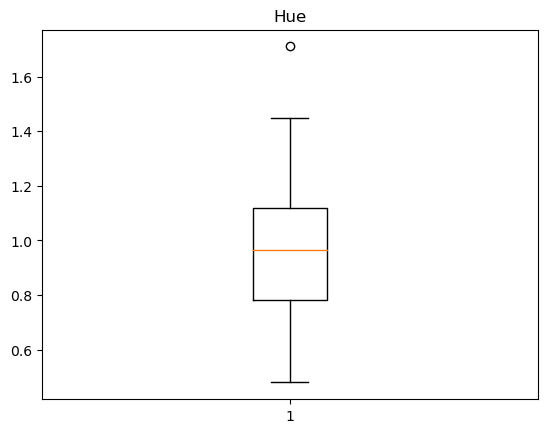

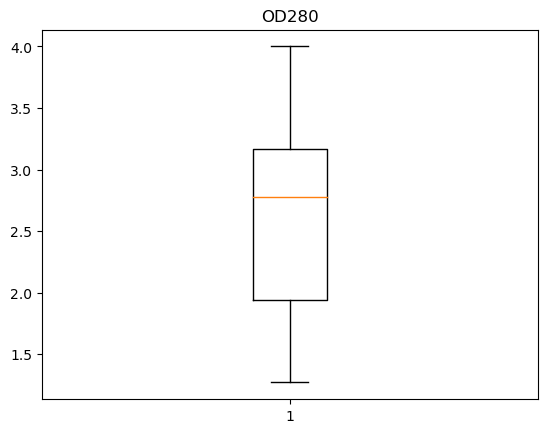

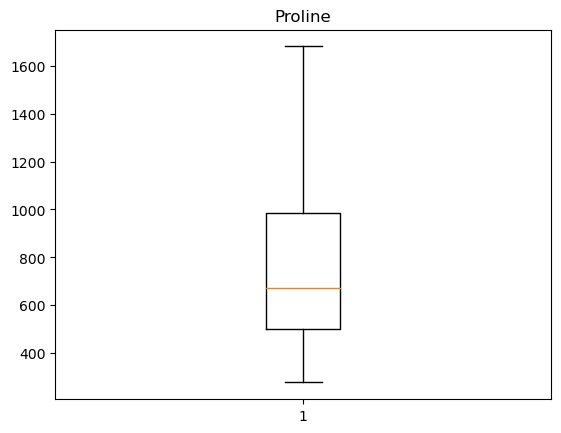

In [10]:
df=wine_data.columns
for i in df:
    plt.figure()
    plt.boxplot(wine_data[i])
    plt.title(i)

No outliers are present

**CORRELATION MATRiX**

<AxesSubplot:>

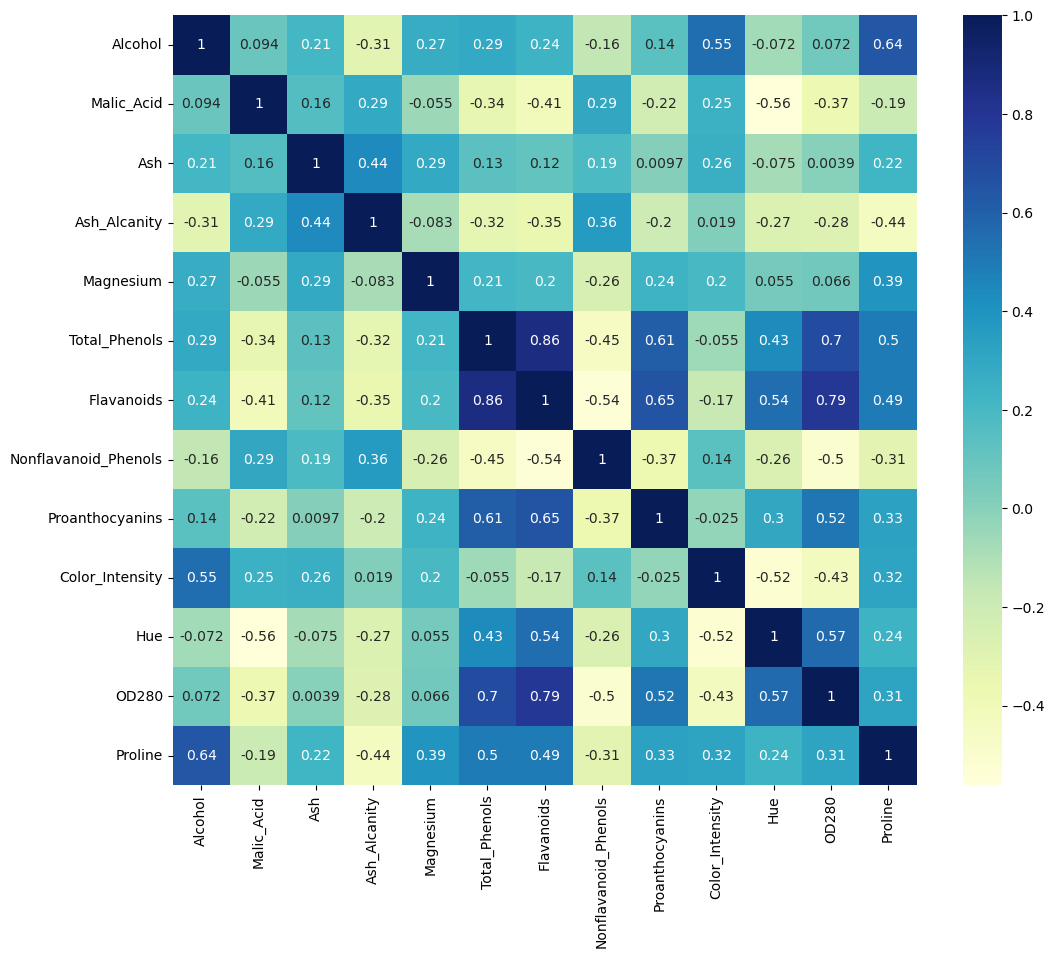

In [11]:
corrmatrix=wine_data.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

# Clustering

In [12]:
from sklearn.cluster import KMeans,AgglomerativeClustering,AffinityPropagation,DBSCAN

**Model Training**

In [13]:
#Scaling the data using standard scaler

In [14]:
from sklearn.preprocessing import StandardScaler
float_columns = [x for x in wine_data.columns]
sc = StandardScaler()
df1 = wine_data.copy()
x=wine_data[float_columns]
wine_data_scaled = sc.fit_transform(wine_data[float_columns])

wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [16]:
wine_data_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
# Create principal components
pca=PCA(n_components = 5)
pca.fit(wine_data_scaled)

PCA(n_components=5)

In [19]:
x_pca=pca.transform(wine_data_scaled)

In [20]:
x_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01,  6.93042841e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01, -2.57654635e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01, -2.51033118e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01, -3.11841591e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01,  2.98457503e-01],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01, -6.32018734e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02, -1.02776191e+00],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00,  7.69034938e-02],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00,
         5.62703612e-02, -8.92256977e-01],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01,
         3.49381568e-01

In [21]:
#convert X_pca to DF
x_pca = pd.DataFrame(x_pca)
x_pca2=x_pca.copy()

x_pca

,0,1,2,3,4
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164
174,-2.601956,-1.757229,0.207581,0.349496,0.255063
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955


In [22]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294])

In [23]:
np.sum(pca.explained_variance_ratio_)

0.8016229275554787

# 1. KMeans

In [24]:
wcss= []
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(wine_data_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
wcss

[2314.0000000000005,
 1659.0079672511501,
 1277.928488844642,
 1175.7051928197118,
 1104.8616839625317,
 1042.3872037251417,
 988.0533283180055,
 940.708165089653,
 902.0783170433883,
 866.7991687164845,
 816.9778775673813,
 802.8796543612843]

In [26]:
#plotting no.of clusters vs wcss

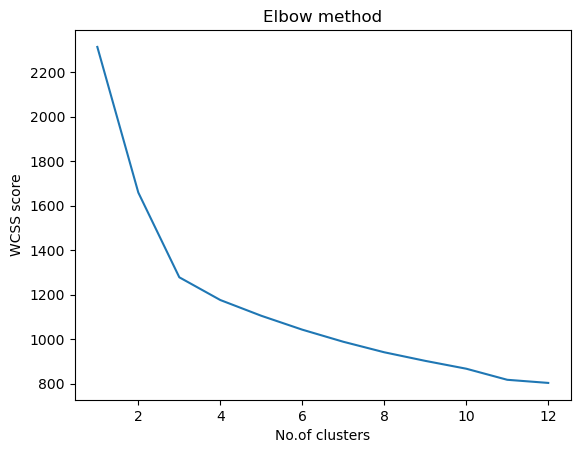

In [27]:
plt.plot(range(1,13),wcss)
plt.title('Elbow method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS score')
plt.show()

In [28]:
#from elbow method optimum no.of clusters=3

In [29]:
#kmeans model
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(wine_data_scaled)

In [30]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
wine_data['kmeans'] = y_kmeans
wine_data['kmeans'] 

0      1
1      1
2      1
3      1
4      1
      ..
173    0
174    0
175    0
176    0
177    0
Name: kmeans, Length: 178, dtype: int32

In [32]:
wine_data['kmeans'].value_counts()

2    65
1    62
0    51
Name: kmeans, dtype: int64

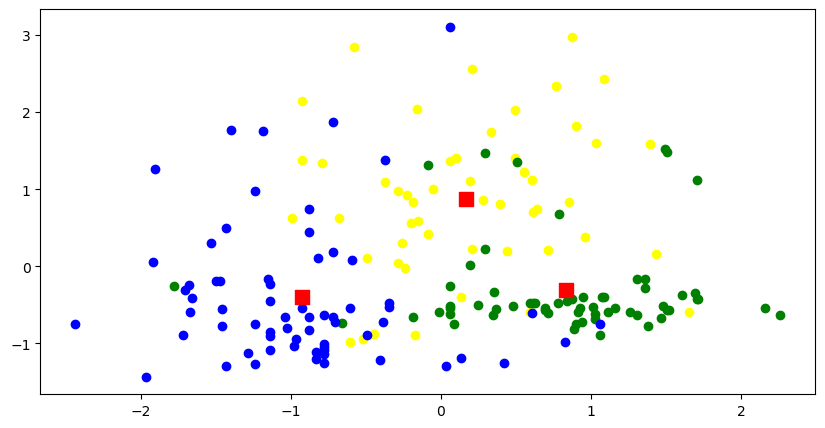

In [33]:
plt.figure(figsize=(10,5))

plt.scatter(wine_data_scaled[y_kmeans==0,0],wine_data_scaled[y_kmeans==0,1],c='yellow',label='C1')

plt.scatter(wine_data_scaled[y_kmeans==1,0],wine_data_scaled[y_kmeans==1,1],c='g',label='C2')

plt.scatter(wine_data_scaled[y_kmeans==2,0],wine_data_scaled[y_kmeans==2,1],c='b',label='C3')

fig=plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,marker='s',label='centroids',c='r')

There is too much of overlapping clusters.we will try with PCA

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_sc=silhouette_score(wine_data_scaled,y_kmeans)

In [36]:
print(silhouette_sc)

0.2848589191898987


In [37]:
kmeansPCA = KMeans(n_clusters=3,init='k-means++', random_state=42)
kmeansPCA = kmeansPCA.fit(x_pca2)
x_pca2['kmeans PCA'] = kmeansPCA.labels_
x_pca2.head()

,0,1,2,3,4,kmeans PCA
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,1


In [38]:
x_pca2['kmeans PCA'].value_counts()

2    65
1    62
0    51
Name: kmeans PCA, dtype: int64

In [39]:
X_PCA_A= PCA(n_components=2)  
X_PCA_A = X_PCA_A.fit_transform(wine_data_scaled)
#convert X_pca to DF
X_PCA_A = pd.DataFrame(X_PCA_A)

kmeansPCA = KMeans(n_clusters=3, random_state=42)
kmeansPCA = kmeansPCA.fit(X_PCA_A)
X_PCA_A['kmeans PCA'] = kmeansPCA.labels_
X_PCA_A.head()

,0,1,kmeans PCA
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


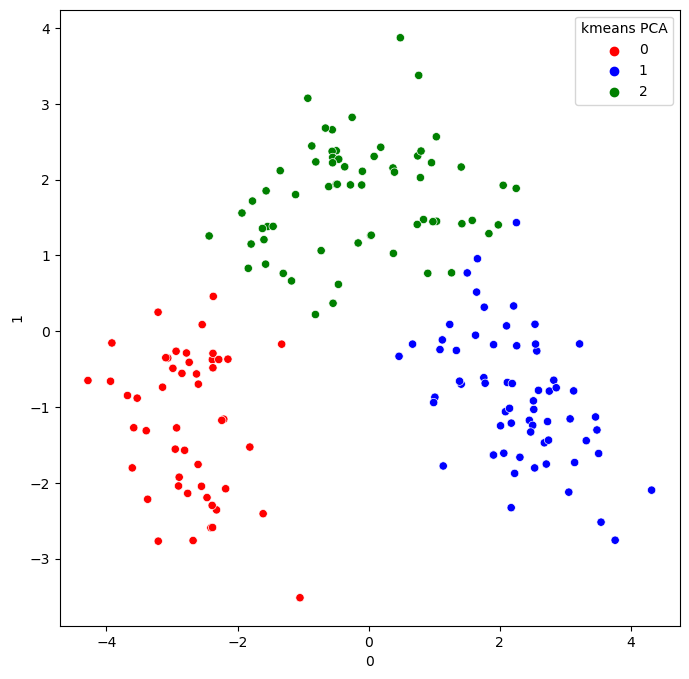

In [40]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=0, y=1, hue='kmeans PCA', data=X_PCA_A,palette=["r","b","g"]);

We got good clusters with PCA.

# 2.Agglomerative Clustering

In [41]:
import scipy.cluster.hierarchy as sch

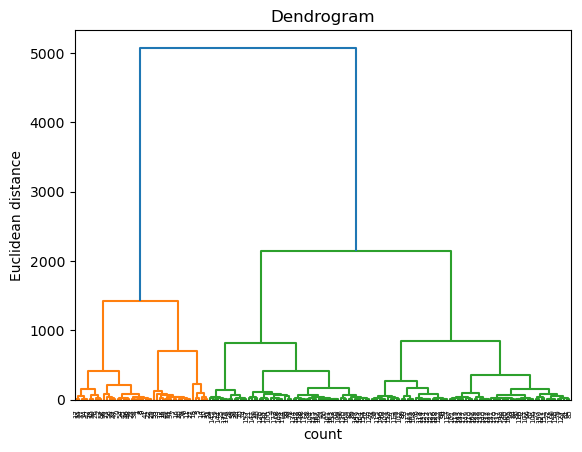

In [42]:
dendrogram=sch.dendrogram(sch.linkage(wine_data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('count')
plt.ylabel('Euclidean distance')
plt.show()

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
hc = AgglomerativeClustering(n_clusters =2 ,affinity='euclidean',linkage='ward')

In [45]:
y_hc = hc.fit_predict(wine_data)

In [46]:
#silhouette score
from sklearn.metrics import silhouette_score
sillhouette_avg=silhouette_score(wine_data,y_hc)
print(sillhouette_avg)

0.658717007720508


# DBSCAN

In [47]:
from sklearn.cluster import DBSCAN

In [52]:
DBS = DBSCAN(eps = 3, min_samples = 12)

identified_clusters = DBS.fit_predict(wine_data_scaled)

data_with_clusters=df1.copy()
data_with_clusters['Cluster'] = identified_clusters

In [53]:
identified_clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

No clusters were found.

**Inferences**

* from above learnings Kmeans clustring and Agglomerative Clustering was good to predict the wine quality.
* There are 3 quality of wine are found in dataset.
* The silhouette score of agglomerative clustering is largest.
* colour intensity and alcohol is highly correlated with wine quality.